In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
pd.set_option('display.float_format',"{:.2f}".format) #소수점 옵션 설정

In [3]:
df = pd.read_csv('../stroke-data.csv')

## 기술통계

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [33]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [39]:
df[['bmi']].describe()

,bmi
count,4909.00
mean,28.89
std,7.85
min,10.30
25%,23.50
50%,28.10
75%,33.10
max,97.60


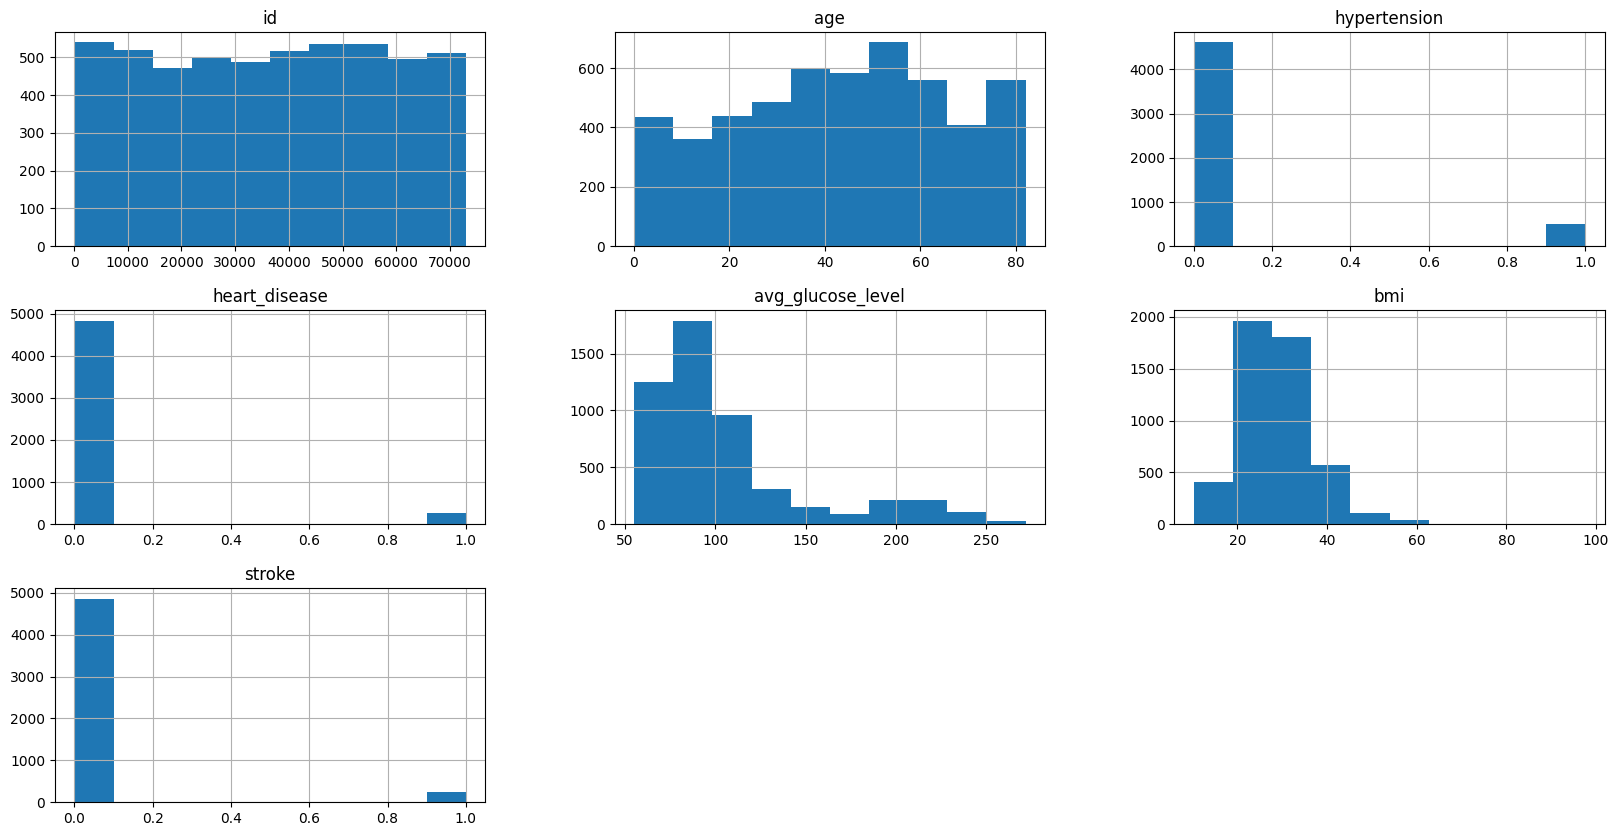

In [43]:
df.hist(figsize=(20,10))
plt.show()

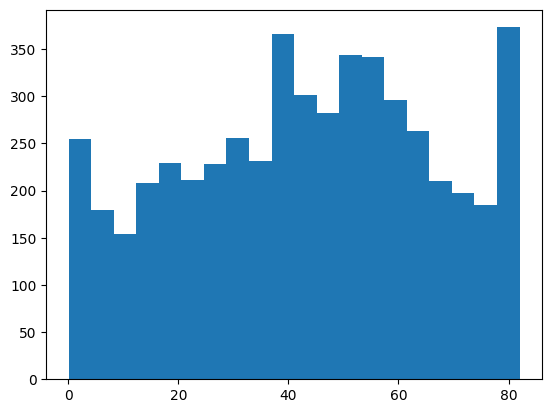

In [51]:
plt.hist(df['age'],bins=20)
plt.show()

In [ ]:
# IQR 방식의 이상치 제거
bmi=df['bmi'].dropna()
# print(bmi.isnull().value_counts()) # 결측치 제거 확인용

q1 = np.percentile(bmi,q=25)
q3 = np.percentile(bmi,q=75)
iqr = q3-q1

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f' q1 : {q1}\n q3 : {q3}\n iqr : {iqr}\n lower_whisker : {lower_whisker}\n upper_whiskr : {upper_whisker}')

 q1 : 23.5
 q3 : 33.1
 iqr : 9.600000000000001
 lower_whisker : 9.099999999999998
 upper_whiskr : 47.5


In [ ]:
df.loc[(df['bmi']< lower_whisker) | (df['bmi'] > upper_whisker)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.00,1,0,Yes,Self-employed,Urban,233.29,48.90,never smoked,1
113,41069,Female,45.00,0,0,Yes,Private,Rural,224.10,56.60,never smoked,1
254,32257,Female,47.00,0,0,Yes,Private,Urban,210.95,50.10,Unknown,0
258,28674,Female,74.00,1,0,Yes,Self-employed,Urban,205.84,54.60,never smoked,0
270,72911,Female,57.00,1,0,Yes,Private,Rural,129.54,60.90,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4858,1696,Female,43.00,0,0,Yes,Private,Urban,100.88,47.60,smokes,0
4906,72696,Female,53.00,0,0,Yes,Private,Urban,70.51,54.10,never smoked,0
4952,16245,Male,51.00,1,0,Yes,Self-employed,Rural,211.83,56.60,never smoked,0
5009,40732,Female,50.00,0,0,Yes,Self-employed,Rural,126.85,49.50,formerly smoked,0


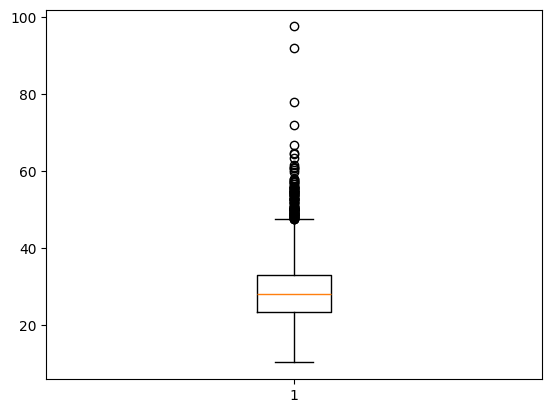

In [ ]:
#boxplot
plt.boxplot(bmi)
plt.show()

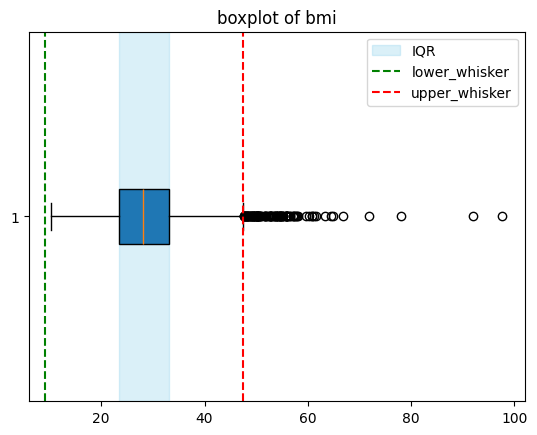

In [ ]:
plt.boxplot(bmi,vert=False , patch_artist=True)

# IQR 영역 시각화
plt.axvspan(q1,q3, color= 'skyblue', alpha=0.3, label='IQR')

#whisker

# lower whisker
plt.axvline(lower_whisker,
            color ='green',
            linestyle = '--',
            label ='lower_whisker')            

# upper whisker
plt.axvline(upper_whisker,
            color ='red',
            linestyle = '--',
             label = 'upper_whisker')           

plt.title('boxplot of bmi')
plt.legend()
plt.show()

In [92]:
# 표본 만들기

sample_df = df.sample(200)

In [93]:
sample_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,200.00,200.00,200.00,200.00,200.00,191.00,200.00
mean,35926.80,45.33,0.09,0.07,111.64,28.18,0.07
std,21090.68,23.17,0.29,0.26,50.41,7.22,0.25
min,210.00,0.24,0.00,0.00,55.23,15.00,0.00
25%,16311.50,28.00,0.00,0.00,77.12,23.45,0.00
50%,36881.00,48.50,0.00,0.00,93.05,27.60,0.00
75%,53945.75,64.00,0.00,0.00,123.58,31.60,0.00
max,72836.00,82.00,1.00,1.00,266.59,64.40,1.00


In [95]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


### 실습1 : 중심극한정리

In [97]:
# bmi 결측치 제거
df.dropna(subset='bmi',inplace=True)

In [99]:
# random_state :  랜덤으로 무언가 작동할때, random_state를 특정값으로 설정하면 항상 동일한 결과를 얻을수 있음.
sample_df = df.sample(30, random_state=1)
bmi_mean = sample_df['bmi'].mean()

bmi_mean

np.float64(30.030000000000005)

In [ ]:
# 표본을 여러번 구해 평군을 리스트화, 그 후 히스토그램을 그린다.

sample_mean_lst = []                    # 샘플을 담을 리스트 생성

for i in range(10000):                                 # 샘플 반복 생성(횟수)
    sample_df_i = df.sample(30,random_state= i)        # 랜덤으로 30개의 샘플 추출
    sample_mean_i = sample_df_i['bmi'].mean()          # 추출한 샘프의 평균값 구하기
    sample_mean_lst.append(sample_mean_i)              # 구한 평균값 (횟수)를 리스트에 담기

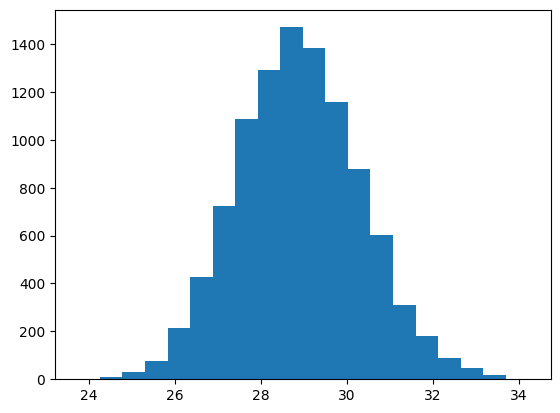

In [103]:
plt.hist(sample_mean_lst,bins=20)
plt.show()

In [104]:
# 표본평균 구하기

mean_of_sample_means = np.mean(sample_mean_lst)
mean_of_population = np.mean(df['bmi'])

print(mean_of_sample_means)
print(mean_of_population)

28.893367333333334
28.893236911794663


In [105]:
# 표본평균의 분산 구하기

# 1. 표본평균의 표준편차
standard_deviation_of_sample_means = np.std(sample_mean_lst)
standard_devation_of_population = np.std(df['bmi'])

# 2. 표준편차를 제곱한다.
variance_of_sample_means = np.power(standard_deviation_of_sample_means,2)
variance_of_population = np.power(standard_devation_of_population,2)

variance_of_sample_means, variance_of_population


(np.float64(2.048695258844), np.float64(61.67379822071127))

In [106]:
variance_of_sample_means, variance_of_population/30

(np.float64(2.048695258844), np.float64(2.055793274023709))